In [2]:
import pandas as pd
import numpy as np
from keras.models import Sequential, load_model
import keras.backend as K
from scipy.stats import pearsonr, spearmanr, ttest_1samp
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
rcParams['svg.fonttype'] = 'none'
rcParams['font.size']=15
import keras.metrics

In [3]:
monocyte_model = load_model('/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_monocyte/model_8_gc_matched_neg.hdf5', compile=False)

In [4]:
X_valid = np.load('/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_monocyte/chr4_summit_centered_validation_set_X_gc_matched_neg.npy')
Y_valid = np.load('/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_monocyte/chr4_summit_centered_validation_set_Y_gc_matched_neg.npy')

In [5]:
model_pred_valid = monocyte_model.predict(X_valid)

Validation: (array([0.82139189]), array([0.]))
Validation: SpearmanrResult(correlation=0.8550767785106402, pvalue=0.0)


/home/eramamur/bin/miniconda3/envs/gpu_keras_theano/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


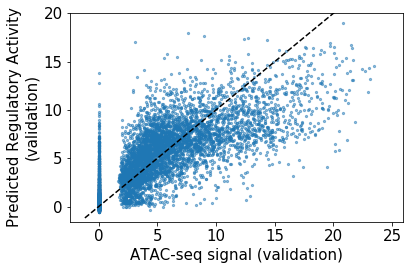

In [6]:
plt.scatter(Y_valid, model_pred_valid, s=5, alpha=0.5, rasterized=True)
plt.xlabel("ATAC-seq signal (validation)")
plt.ylabel("Predicted Regulatory Activity\n(validation)")


x_limits = plt.xlim()
y_limits = plt.ylim()
x_linspace = np.linspace(x_limits[0],x_limits[1],num=50)
y_linspace = x_linspace
plt.plot(x_linspace, x_linspace, c='k', linestyle='--')
plt.ylim(y_limits)
plt.savefig("monocyte_gc_matched_model_held_out_chr_prediction.svg")

print("Validation:",pearsonr(Y_valid, model_pred_valid))
print("Validation:",spearmanr(Y_valid, model_pred_valid))

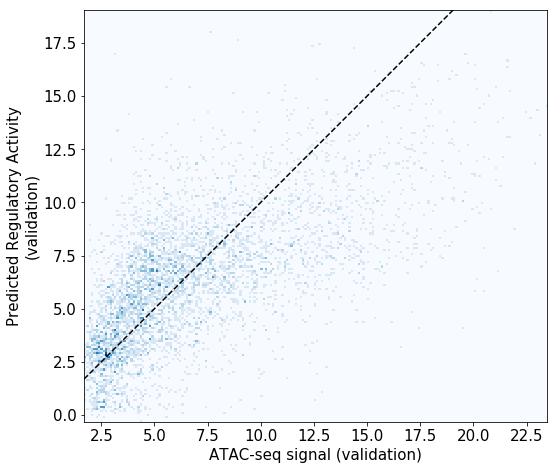

In [7]:
plt.figure(figsize=(8,8))

heatmap, xedges, yedges = np.histogram2d(Y_valid[~(Y_valid==0)].flatten(),
                                         model_pred_valid[~(Y_valid==0)].flatten(),
                                         bins=200
                                        )

extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.imshow(heatmap.T,
           extent=extent,
           origin='lower',
           cmap='Blues'
          )

x_limits = plt.xlim()
y_limits = plt.ylim()
x_linspace = np.linspace(x_limits[0],x_limits[1],num=50)
y_linspace = x_linspace
plt.plot(x_linspace, x_linspace, c='k', linestyle='--')
plt.ylim(y_limits)
plt.xlabel("ATAC-seq signal (validation)")
plt.ylabel("Predicted Regulatory Activity\n(validation)")
plt.show()

In [8]:
(Y_valid==0).sum()

3548

(array([ 13.,  68., 193., 569., 684., 509., 285., 237., 167., 108.,  77.,
         55.,  55.,  38.,  35.,  30.,  33.,  21.,  20.,  31.,  17.,  25.,
         13.,  28.,  15.,  11.,  12.,  15.,   6.,  11.,   9.,  13.,   7.,
          7.,  11.,  11.,  11.,   4.,  12.,   4.,   6.,   2.,   1.,  10.,
          2.,   3.,   5.,   5.,   4.,   6.,   7.,   1.,   1.,   6.,   2.,
          0.,   1.,   1.,   0.,   1.,   1.,   1.,   2.,   0.,   2.,   0.,
          1.,   0.,   1.,   0.,   1.,   1.,   0.,   0.,   0.,   1.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([-5.90796769e-01, -4.46422637e-01, -3.02048475e-01, -1.57674327e-01,
        -1.33001897e-02,  1.31073952e-01,  2.75448114e-01,  4.19822246e-01,
         5.64196408e-01,  7.08570540e-01,  8.52944672e-01,  9.97318804e-01,
         1.14169300e+00,  1.28606713e+00,  1.43044126e+00,  1.57481539e+00,
         1.719

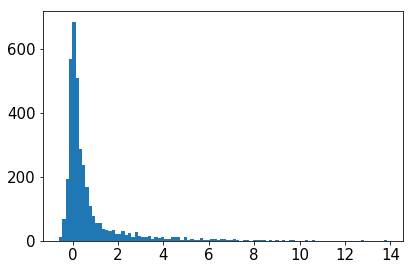

In [9]:
plt.hist(model_pred_valid[Y_valid==0], bins=100)

In [7]:
X_train = np.load('/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_monocyte/chrs_training_summit_centered_training_set_X_gc_matched_neg.npy')
Y_train = np.load('/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_monocyte/chrs_training_summit_centered_training_set_Y_gc_matched_neg.npy')

In [8]:
model_pred_train = monocyte_model.predict(X_train)

KeyboardInterrupt: 

In [ ]:
plt.scatter(Y_train, model_pred_train, s=5)
plt.xlabel("ATAC-seq signal (training)")
plt.ylabel("Predicted Regulatory Activity\n(training)")


plt.savefig("monocyte_model_training_chrs_prediction.png")

print("Validation:",pearsonr(Y_train, model_pred_train))
print("Validation:",spearmanr(Y_train, model_pred_train))